In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient

In [3]:
# Connexion à MongoDB et chargement des données
client = MongoClient("localhost", 27017)
db = client.IF29
collec = db.user_db_pca
data = pd.DataFrame(list(collec.find()))
print(data)
sample_data = data.sample(frac=0.02, random_state=42)

X = sample_data.drop(columns=['_id'])
Y= sample_data['_id'].copy()

                         _id      pca0      pca1      pca2      pca3  \
0                        418  7.031512  9.606121 -2.861546  2.035172   
1                        730 -0.178348  0.256096 -1.791521 -1.495685   
2                        761  1.448767 -0.128787 -2.363256 -0.287757   
3                        885  3.468847  5.987987 -4.033890  1.611682   
4                        922  0.440618  0.536790 -1.714077  0.029786   
...                      ...       ...       ...       ...       ...   
1843434  1008392352644386816 -1.135086  0.195285  1.388125 -0.008933   
1843435  1008392445837692933 -1.133827  0.194532  1.388737 -0.009059   
1843436  1008392594878066688 -1.113471  0.191946  1.527336  0.390469   
1843437  1008392729930366976 -1.136345  0.196039  1.387513 -0.008807   
1843438  1008392769428221952 -1.144907  0.207098  1.828799  0.845116   

             pca4      pca5      pca6      pca7      pca8  
0        0.062446 -0.620613  3.865267 -4.618006  0.345712  
1        0.5058

In [4]:
cah = linkage(X, method="ward")
print(cah)

[[3.12590000e+04 3.13230000e+04 0.00000000e+00 2.00000000e+00]
 [3.21300000e+03 2.13160000e+04 0.00000000e+00 2.00000000e+00]
 [4.72700000e+03 2.81000000e+04 0.00000000e+00 2.00000000e+00]
 ...
 [7.37300000e+04 7.37330000e+04 2.52015303e+02 3.65010000e+04]
 [7.37130000e+04 7.37320000e+04 2.63324563e+02 3.68000000e+02]
 [7.37340000e+04 7.37350000e+04 2.88391851e+02 3.68690000e+04]]


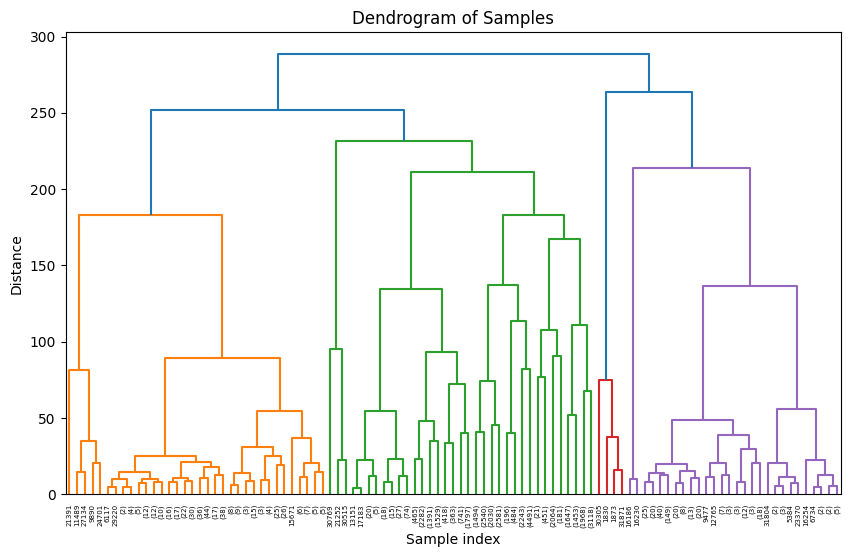

In [5]:
# Dendrogramme des échantillons
plt.figure(figsize=(10, 6))
dendrogram(cah, truncate_mode="level", p=7, color_threshold = 240 
           )
plt.title('Dendrogram of Samples')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [7]:
max_d = 240  # Vous pouvez ajuster ce seuil de distance selon vos besoins
clusters = fcluster(cah, max_d, criterion='distance')

In [8]:
result_df = pd.DataFrame({'_id': Y, 'cluster': clusters})

In [9]:
# Charger les données de la base de données B pour la mise à jour
db_B = client['IF29']
collection_B = db_B['user_db']

# Mettre à jour les documents de la base de données B avec les étiquettes de cluster
for index, row in result_df.iterrows():
    id_value = int(row['_id'])
    cluster_label = int(row['cluster'])  # Convertir en int si nécessaire
    collection_B.update_one({'_id': id_value}, {'$set': {'cah': cluster_label}})